## scikit-learn으로 실습

#### 1. iris 데이터 불러오기

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd


import warnings
warnings.filterwarnings(action="ignore")

dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
dataset.data.shape

(150, 4)

In [11]:
dataset.target.shape

(150,)

In [12]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
dataset.target[50:60]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state=42)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [17]:
y_train_scaled = y_train

#### 2. pandas의 시각화 기능으로 박스 플롯을 그려 스케일 확인

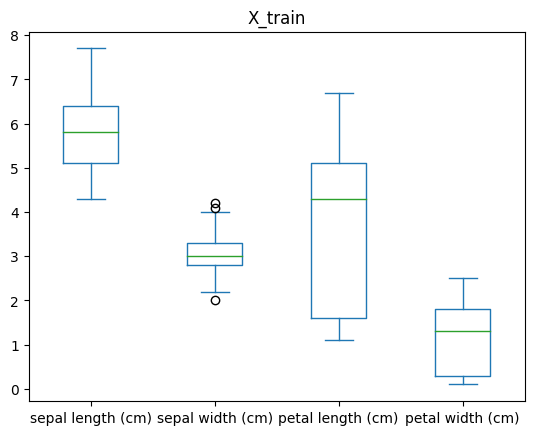

In [4]:
import matplotlib.pyplot as plt

X_train.plot(kind="box")
plt.title("X_train")
plt.show()

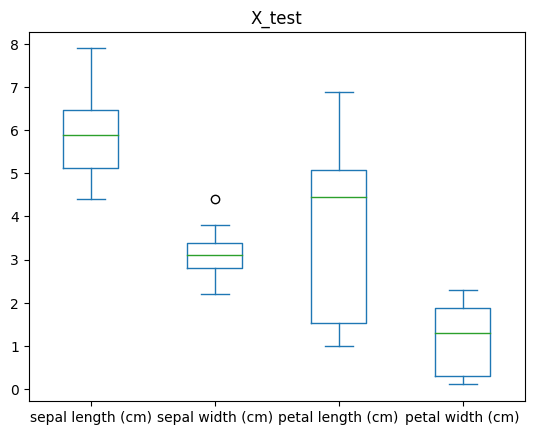

In [5]:
X_test.plot(kind="box")
plt.title("X_test")
plt.show()

#### 3. 학습데이터 전처리 (Scale)

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)
print("X_train_scaled:\n", X_train_scaled)
print("X_test_scaled:\n", X_test_scaled)

X_train_scaled:
 [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125   

// cf. StandardScaler 사용

In [20]:
from sklearn.preprocessing import StandardScaler

mms = StandardScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)
print("X_train_scaled:\n", X_train_scaled)
print("X_test_scaled:\n", X_test_scaled)

X_train_scaled:
 [[-1.01827123  1.2864604  -1.39338902 -1.3621769 ]
 [-0.7730102   2.43545215 -1.33550342 -1.49647603]
 [-0.03722712 -0.78172474  0.74837808  0.92090833]
 [ 0.20803391  0.8268637   0.4010645   0.51801093]
 [ 1.06644751  0.13746866  0.51683569  0.3837118 ]
 [-0.52774918  1.97585545 -1.45127462 -1.09357864]
 [-0.52774918  1.51625875 -1.33550342 -1.3621769 ]
 [-0.40511866 -1.47111979 -0.06202028 -0.28778385]
 [ 0.57592545 -0.55192639  0.74837808  0.3837118 ]
 [ 0.69855596  0.13746866  0.97992047  0.7866092 ]
 [ 0.94381699 -0.09232969  0.3431789   0.24941267]
 [ 1.67960008  1.2864604   1.32723405  1.72670311]
 [-0.15985763 -0.32212804  0.2274077   0.11511354]
 [ 2.17012213 -0.09232969  1.61666204  1.18950659]
 [-0.28248815 -0.09232969  0.4010645   0.3837118 ]
 [-0.89564072  1.05666205 -1.39338902 -1.3621769 ]
 [ 2.29275265 -0.55192639  1.67454764  1.05520746]
 [-0.03722712 -0.78172474  0.16952211 -0.28778385]
 [-0.7730102   0.8268637  -1.39338902 -1.3621769 ]
 [-1.01827123 

#### 4. 모델 생성 및 학습

<h4 style="color:#ff6600;">- KNeighborsClassifier 파라미터</h4>

- 참고: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier
<br>

- n_neighbors: 분류 시 고려할 인접 샘플 수 => k값!! (가장 가까운 이웃 몇개를 고를지에 대한 파라미터) (default=5)
- weights: 'distance' - 인접한 샘플 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치) (default='uniform')
- metric: 거리계산의 척도(minkowski, euclidean, manhattan 등) (default='minkowski' => 'p'라는 매개 변수를 추가 사용 (p=1: manhattan / p=2: euclidean과 동일) ex. KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski') / p=2가 기본값)
- n_jobs: 사용할 코어의 개수, -1이면 전부 사용

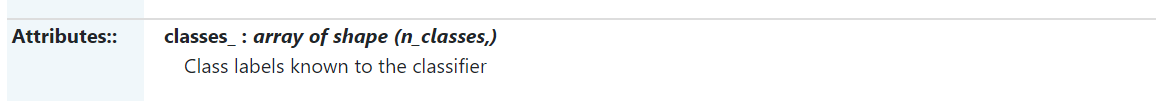

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
# model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### 5. 모델 예측 및 평가

In [27]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

1.0

### cf) 파라미터 중 가장 좋은 조합 찾기 => GridSearchCv


In [34]:
from sklearn.model_selection import GridSearchCV, KFold

estimator = KNeighborsClassifier()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
param = {
    'n_neighbors': [5, 10, 11, 12, 13, 14, 15],
    'weights': ['distance', 'uniform'],
    'metric': ['minkowski', 'eculidean', 'manhattan'],
    'p':[1, 2]
}

model2 = GridSearchCV(estimator=estimator, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'eculidean', 'manhattan'],
                         'n_neighbors': [5, 10, 11, 12, 13, 14, 15],
                         'p': [1, 2], 'weights': ['distance', 'uniform']},
             verbose=-1)

In [35]:
print("Best Estimator:\n", model2.best_estimator_,"\n")
print("Best Params:\n", model2.best_params_,"\n")
print("Best Score:\n", model2.best_score_,"\n")

Best Estimator:
 KNeighborsClassifier(n_neighbors=11, p=1) 

Best Params:
 {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'} 

Best Score:
 0.9636363636363635 



In [37]:
model3 = GridSearchCV(estimator=estimator, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model3.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'eculidean', 'manhattan'],
                         'n_neighbors': [5, 10, 11, 12, 13, 14, 15],
                         'p': [1, 2], 'weights': ['distance', 'uniform']},
             verbose=-1)

In [38]:
print("Best Estimator:\n", model3.best_estimator_,"\n")
print("Best Params:\n", model3.best_params_,"\n")
print("Best Score:\n", model3.best_score_,"\n")

Best Estimator:
 KNeighborsClassifier(p=1, weights='distance') 

Best Params:
 {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

Best Score:
 0.9545454545454545 



--- 
#### Answer

In [43]:
from sklearn.model_selection import GridSearchCV, KFold

knn_model = KNeighborsClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
param = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['distance', 'uniform'],
    'metric': ['minkowski'],
    'p':[1, 2]
}

model4 = GridSearchCV(estimator=knn_model, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model4.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2], 'weights': ['distance', 'uniform']},
             verbose=-1)

In [44]:
print("Best Estimator:\n", model4.best_estimator_,"\n")
print("Best Params:\n", model4.best_params_,"\n")
print("Best Score:\n", model4.best_score_,"\n")

Best Estimator:
 KNeighborsClassifier(n_neighbors=4) 

Best Params:
 {'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'} 

Best Score:
 0.9545454545454547 



## 농구선수 포지션 예측 실습

### 1. 라이브러리 임포트

In [45]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 출력 위한 선언
%matplotlib inline

# sklearn모델의 동일한 결과 출력 위한 선언
np.random.seed(5)

####  - 속성(컬럼) 설명

- Player: 플레이어의 이름
- Pos: 플레이어의 포지션. 'SG'-슈팅가드, 'C'-센터
- 3P: 평균 한 경기 3점슛 성공 횟수
- TRB: 평균 한 경기 리바운드 성공 횟수
- BLK: 평균 한 경기 블로킹 성공 횟수

In [46]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

print(train)
print("------------------------------------------------------")
print(test)

                 Player Pos   3P  TRB  BLK
0      Denzel Valentine  SG  1.3  2.6  0.1
1           Kyle Korver  SG  2.4  2.8  0.3
2          Troy Daniels  SG  2.1  1.5  0.1
3          Tim Hardaway  SG  1.9  2.8  0.2
4        Dewayne Dedmon   C  0.0  6.5  0.8
..                  ...  ..  ...  ...  ...
75       Victor Oladipo  SG  1.9  4.3  0.3
76  Willie Cauley-Stein   C  0.0  4.5  0.6
77          Brook Lopez   C  1.8  5.4  1.7
78      Josh Richardson  SG  1.4  3.2  0.7
79         Lou Williams  SG  2.0  2.5  0.2

[80 rows x 5 columns]
------------------------------------------------------
                  Player Pos   3P   TRB  BLK
0           JaVale McGee   C  0.0   3.2  0.9
1          Manu Ginobili  SG  1.3   2.3  0.2
2           Nene Hilario   C  0.0   4.2  0.6
3          Evan Fournier  SG  1.9   3.1  0.1
4   Georgios Papagiannis   C  0.0   3.9  0.8
5          Anthony Davis   C  0.5  11.8  2.2
6            Tarik Black   C  0.0   5.1  0.7
7         Jamal Crawford  SG  1.4   1.6  0.2
8

### 2. 최적의 k 찾기 (교차 검증 - cross validation)

In [58]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2   # 2차원 구조
max_k_range

40

In [59]:
k_list = []

for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

# k값의 후보군

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [60]:
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring="accuracy")
    cross_validation_scores.append(scores.mean())

cross_validation_scores

# ravel(): 1차원 구조의 배열로 반환
# 평균값이 가장 좋은 k를 출력하겠다는 의미

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

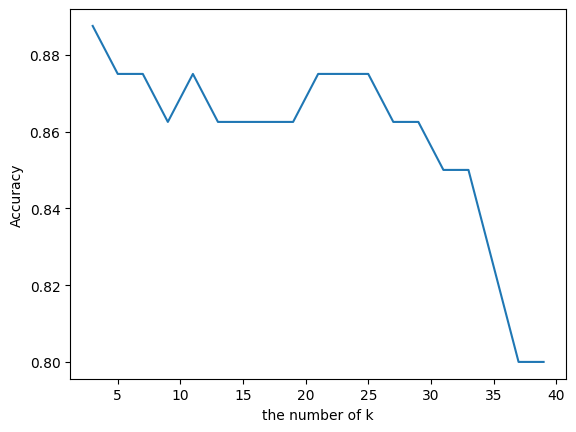

In [61]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [51]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k: " + str(k))

# max(cross_validation_scores) 가장 큰 값이 가장 좋은 값
# k_list에서 가장 큰 값의 위치를 저장

The best number of k: 3


### 3. 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [52]:
#  import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# select data features
x_train = train[['3P', 'BLK']]
# select target value
y_train = train[['Pos']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data features to be used for prediction
x_test = test[['3P', 'BLK']]
# select target value
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [53]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [54]:
# check accuracy
print("accuracy: " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy: 1.0


### 4. 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [55]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [56]:
comparison = pd.DataFrame({'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [57]:
print("accuracy: " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy: 0.95


---

## 타이타닉 데이터로 KNN 실습

- PassengerId, Name, Ticket, Fare, Cabin 컬럼 삭제
- Age는 평균, Embarked는 최빈값
- Sex는 레이블 인코딩, Embarked는 원-핫인코딩
- 스케일링은 MinMaxScaler

Q. 최적의 k를 찾아 정확도를 출력하시오.

In [99]:
df = pd.read_csv("../2_DataAnalysis/titanic/train.csv")

In [100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
df2 = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [102]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [103]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [104]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [105]:
df2['Embarked'].mode()

0    S
dtype: object

In [106]:
df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [107]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex_encoder = le.fit_transform(df2['Sex'])
sex_encoder

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [109]:
df2['Sex'] = sex_encoder
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [110]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
embarked_encoder = enc.fit_transform(df2[['Embarked']])
print(embarked_encoder)

  (0, 2)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 0)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 1)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 0)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 1)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (866, 0)	1.0
  (867, 2)	1.0
  (868, 2)	1.0
  (869, 2)	1.0
  (870, 2)	1.0
  (871, 2)	1.0
  (872, 2)	1.0
  (873, 2)	1.0
  (874, 0)	1.0
  (875, 0)	1.0
  (876, 2)	1.0
  (877, 2)	1.0
  (878, 2)	1.0
  (879, 0)	1.0
  (880, 2)	1.0
  (881, 2)	1.0
  (882, 2)	1.0
  (883, 2)	1.0
  (884, 2)	1.0
  (885, 1)	1.0
  (886, 2)	1.0
  (887, 2)	1.0
  (888, 2)	1.0
  (889, 0)	1.0
  (890, 1)	1.0


In [111]:
df2['Embarked'] = embarked_encoder.toarray()
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,0.0
1,1,1,0,38.000000,1,0,1.0
2,1,3,0,26.000000,0,0,0.0
3,1,1,0,35.000000,1,0,0.0
4,0,3,1,35.000000,0,0,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0.0
887,1,1,0,19.000000,0,0,0.0
888,0,3,0,29.699118,1,2,0.0
889,1,1,1,26.000000,0,0,1.0


In [112]:
x_data = df2.iloc[:, 1:]
y_data = df2['Survived']
x_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,0.0
1,1,0,38.000000,1,0,1.0
2,3,0,26.000000,0,0,0.0
3,1,0,35.000000,1,0,0.0
4,3,1,35.000000,0,0,0.0
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,0.0
887,1,0,19.000000,0,0,0.0
888,3,0,29.699118,1,2,0.0
889,1,1,26.000000,0,0,1.0


In [113]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df2.iloc[:, 1:] = sc.fit_transform(df2.iloc[:, 1:])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,1.0,1.0,0.271174,0.125,0.000000,0.0
1,1,0.0,0.0,0.472229,0.125,0.000000,1.0
2,1,1.0,0.0,0.321438,0.000,0.000000,0.0
3,1,0.0,0.0,0.434531,0.125,0.000000,0.0
4,0,1.0,1.0,0.434531,0.000,0.000000,0.0
...,...,...,...,...,...,...,...
886,0,0.5,1.0,0.334004,0.000,0.000000,0.0
887,1,0.0,0.0,0.233476,0.000,0.000000,0.0
888,0,1.0,0.0,0.367921,0.125,0.333333,0.0
889,1,0.0,1.0,0.321438,0.000,0.000000,1.0


In [117]:
x_data = df2.iloc[:, 1:]
y_data = df2['Survived']

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state=42)
X_train.shape, X_test.shape

((668, 6), (223, 6))

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = X_train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = X_train
y_train = Y_train

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
    cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.7799412030755315,
 0.7739936680235188,
 0.7874038896426956,
 0.7980099502487563,
 0.7980099502487562,
 0.790479421076436,
 0.7859339665309815,
 0.7874491180461329,
 0.7979647218453189,
 0.7978968792401628,
 0.7964269561284487,
 0.8039574853007687,
 0.7964947987336047,
 0.799502487562189,
 0.8009724106739032,
 0.8009724106739032,
 0.7949796472184532,
 0.7965174129353233,
 0.8009950248756219,
 0.7935323383084577,
 0.7935323383084577,
 0.7935323383084577,
 0.7950248756218905,
 0.7935323383084576,
 0.7965174129353233,
 0.7920171867933061,
 0.7920171867933061,
 0.793509724106739,
 0.7905246494798733,
 0.7890321121664405,
 0.7875395748530077,
 0.7830619629127091,
 0.7800768882858435,
 0.7785843509724106,
 0.7785843509724106,
 0.7815694255992762,
 0.7800542740841249,
 0.7860470375395748,
 0.7875395748530077,
 0.7875395748530077,
 0.7875395748530077,
 0.7890321121664405,
 0.7875169606512891,
 0.7875169606512891,
 0.7875169606512891,
 0.7875169606512891,
 0.7875169606512891,
 0.7875169606512

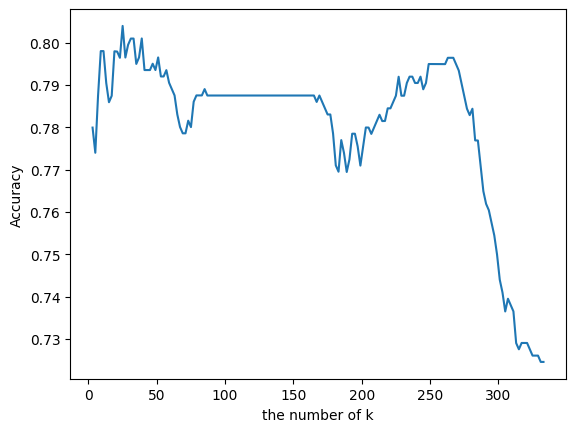

In [129]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [130]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 25


In [131]:
knn.fit(x_train, y_train.values.ravel())

x_test = X_test
y_test = Y_test

pred = knn.predict(x_test)
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [132]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,0,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
218,0,1
219,0,0
220,0,0
221,0,0


In [133]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.7354260089686099


---

## Answer

In [134]:
df = pd.read_csv("../2_DataAnalysis/titanic/train.csv")

In [135]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [136]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C
890,0,3,male,32.000000,0,0,Q


In [137]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C
890,0,3,male,32.000000,0,0,Q


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [139]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [140]:
df = pd.get_dummies(df, columns=['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,0,0,1
1,1,1,0,38.000000,1,0,1,0,0
2,1,3,0,26.000000,0,0,0,0,1
3,1,1,0,35.000000,1,0,0,0,1
4,0,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0,0,1
887,1,1,0,19.000000,0,0,0,0,1
888,0,3,0,29.699118,1,2,0,0,1
889,1,1,1,26.000000,0,0,1,0,0


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], random_state=42)
X_train.shape, X_test.shape

((668, 8), (223, 8))

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

knn_model = KNeighborsClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=True)
param = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['distance', 'uniform'],
    'metric': ['minkowski'],
    'p':[1, 2]
}

model = GridSearchCV(estimator=knn_model, param_grid=param, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2], 'weights': ['distance', 'uniform']},
             verbose=-1)

In [147]:
print("Best Estimator:\n", model.best_estimator_,"\n")
print("Best Params:\n", model.best_params_,"\n")
print("Best Score:\n", model.best_score_,"\n")

Best Estimator:
 KNeighborsClassifier(n_neighbors=12, p=1) 

Best Params:
 {'metric': 'minkowski', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'} 

Best Score:
 0.8113455279991022 



In [148]:
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=12, p=1, weights='uniform')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [149]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test_scaled)
score = accuracy_score(y_test, pred)
print("test score: ", score)

test score:  0.8026905829596412
